In [1]:
import numpy as np
import pandas as pd

import pandas_datareader as pdr
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

/Users/mehulnagpurkar/anaconda3/envs/analytics/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [80]:
from collections import defaultdict

In [50]:
start = datetime(2019, 12, 1)
end = datetime.today()

In [51]:
def get_stocks(name):
    stock = pdr.get_data_yahoo(symbols=name, start=start, end=end)
    return stock


#df = get_stocks('VAS.AX')
#print(df['Adj Close'])

In [8]:
df.xs(key='Adj Close', axis = 1).max()

90.81999969482422

In [13]:
# get a list of stocks
ticker_df = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
stocks_df = ticker_df[0]
#tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [17]:
tickers = [tick for tick in stocks_df['Symbol']]

In [18]:
stocks_df

,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...,...
500,YUM,Yum! Brands Inc,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,NaN
501,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
502,ZBH,Zimmer Biomet Holdings,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,NaN
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,NaN


In [117]:
# Different sectors
set(stocks_df['GICS Sector'])

{'Communication Services',
 'Consumer Discretionary',
 'Consumer Staples',
 'Energy',
 'Financials',
 'Health Care',
 'Industrials',
 'Information Technology',
 'Materials',
 'Real Estate',
 'Utilities'}

In [52]:
stock_dict = {}

for tick in tickers:
    try:
        stock_dict[tick] = get_stocks(tick)
    except:
        print('Exception occured for -  ', tick)

Exception occured for -   BRK.B
Exception occured for -   BF.B
Exception occured for -   RTX
Exception occured for -   STX
Exception occured for -   VIAC


In [53]:
len(stock_dict.keys())

500

In [54]:
returns = pd.DataFrame()

for key in stock_dict.keys():
    returns[key + ' Return'] = stock_dict[key]['Adj Close'].pct_change()

In [55]:
returns.head()

,MMM Return,ABT Return,ABBV Return,ABMD Return,ACN Return,ATVI Return,ADBE Return,AMD Return,AAP Return,AES Return,...,WYNN Return,XEL Return,XRX Return,XLNX Return,XYL Return,YUM Return,ZBRA Return,ZBH Return,ZION Return,ZTS Return
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-03,-0.018423,-0.001775,-0.012410,-0.005567,-0.004209,0.006638,0.003832,0.004389,-0.025168,-0.004228,...,-0.023369,0.004248,-0.006493,-0.017946,-0.013194,-0.011038,-0.001238,-0.007338,-0.018788,0.005170
2019-12-04,0.011927,0.009720,0.014543,0.014334,0.004176,-0.013006,-0.004607,0.020308,-0.001835,0.003185,...,0.018353,0.008949,0.002614,0.017146,-0.002118,-0.002514,0.012395,0.034658,0.011118,-0.006554
2019-12-05,-0.016573,0.000704,-0.005505,-0.024859,0.001353,0.020601,0.001719,-0.001764,-0.000263,-0.004762,...,-0.003958,0.002096,-0.013820,0.005545,-0.006235,-0.006855,-0.006279,-0.005055,0.003869,0.003090
2019-12-06,0.043195,0.002816,0.002998,0.000793,0.013510,0.004001,0.010560,0.000252,0.015300,-0.004785,...,0.028832,-0.002253,-0.001322,0.013125,0.005473,0.002538,0.021064,0.006165,0.008316,0.013404


In [91]:
# Worst Drop 

drop = defaultdict()

for date in returns.idxmin():
    if str(date).split()[0] in drop.keys():
        drop[str(date).split()[0]] += 1
    else:
        drop[str(date).split()[0]] = 1
        
drop

defaultdict(None,
            {'2020-03-12': 82,
             '2020-03-16': 245,
             '2020-01-13': 1,
             '2020-03-18': 50,
             '2020-03-09': 47,
             '2020-03-20': 27,
             '2020-04-01': 4,
             '2020-03-27': 4,
             '2020-03-23': 14,
             '2020-02-06': 1,
             '2020-03-19': 4,
             '2020-03-25': 2,
             '2020-04-02': 1,
             '2020-01-03': 1,
             '2020-03-02': 2,
             '2019-12-16': 1,
             '2020-03-11': 2,
             '2020-03-13': 1,
             'NaT': 7,
             '2020-02-27': 1,
             '2020-02-07': 1,
             '2020-02-11': 1,
             '2020-01-29': 1})

In [72]:
# checking volatility
pd.DataFrame(returns.std(), columns = ['returns']).sort_values(by = 'returns', ascending=False).head(10)

,returns
ARNC Return,0.135322
APA Return,0.102115
NCLH Return,0.095164
IR Return,0.088940
NBL Return,0.088233
CCL Return,0.086712
DXC Return,0.080454
OXY Return,0.080380
OKE Return,0.080324
RCL Return,0.079565


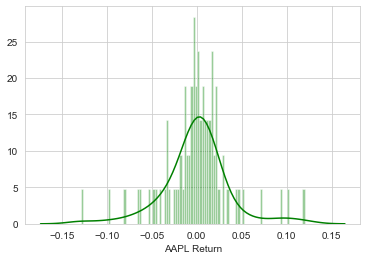

In [74]:
sns.distplot(returns['AAPL Return'],color='green',bins=100)

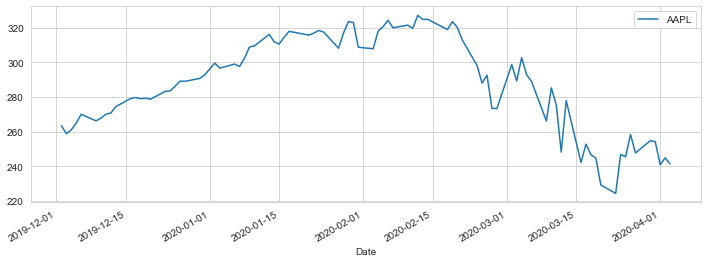

In [75]:
tick = 'AAPL'
stock_dict[tick]['Adj Close'].plot(figsize=(12,4),label=tick)
plt.legend()

In [113]:
# stocks at the biggest discount

discount_dict = {}

def calcualte_discount(df):
    max_price = df['Adj Close'].describe()['75%']
    min_price = df['Adj Close'].min()
    return (max_price - min_price)/max_price
    

for tick in stock_dict.keys():
#     discount_dict[tick] = (stock_dict[tick]['Adj Close'].max() - stock_dict[tick]['Adj Close'].min())/stock_dict[tick]['Adj Close'].max()
    discount_dict[tick] = calcualte_discount(stock_dict[tick])

In [114]:
sorted([(val, key) for key, val in discount_dict.items()], reverse = True)[:15]

[(0.8655787787031876, 'NBL'),
 (0.8627996287856488, 'NCLH'),
 (0.8573329803725857, 'APA'),
 (0.853671185377224, 'IR'),
 (0.832595869689459, 'CCL'),
 (0.8245826730096102, 'RCL'),
 (0.8208436063391492, 'FANG'),
 (0.805380793622138, 'HAL'),
 (0.8021341917774678, 'ARNC'),
 (0.7982426780919094, 'CPRI'),
 (0.7952500400438898, 'OKE'),
 (0.7936596033208089, 'ADS'),
 (0.7816358654155009, 'MGM'),
 (0.7779280667757088, 'DVN'),
 (0.7628589996444297, 'OXY')]

In [110]:
stock_dict[tick]['Adj Close'].describe()

count     86.000000
mean     129.727842
std       11.804019
min       92.660004
25%      121.808899
50%      133.163788
75%      138.339996
max      144.940002
Name: Adj Close, dtype: float64